# Clase 2: Pandas y estadística descriptiva

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# cargamos un dataset del Ministerio de Justicia sobre patentamientos automotores
df = pd.read_csv("http://datos.jus.gob.ar/dataset/1ab0cc03-ab9b-4520-975c-5757d87d1061/resource/4358c995-bb04-4ad9-be4a-a9076dc3e42c/download/estadistica-inscripciones-iniciales-automotores-2019-02.csv")

## Groupby

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [2]:
df.tail()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_id
5803,Automotores,2020,2,Santa Cruz,Z,290,78
5804,Automotores,2020,2,Santa Fe,S,2503,82
5805,Automotores,2020,2,Santiago del Estero,G,261,86
5806,Automotores,2020,2,Tierra del Fuego,V,256,94
5807,Automotores,2020,2,Tucumán,T,792,90


In [3]:
df.groupby("anio_inscripcion_inicial").count().tail()

,tipo_vehiculo,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_id
anio_inscripcion_inicial,,,,,,
2016,288,288,288,288,288,288
2017,288,288,288,288,288,288
2018,288,288,288,288,288,288
2019,288,288,288,288,288,288
2020,48,48,48,48,48,48


In [4]:
df.groupby(["anio_inscripcion_inicial", "mes_inscripcion_inicial"]).count().tail()

tipo_vehiculo  \
anio_inscripcion_inicial mes_inscripcion_inicial                  
2019                     10                                  24   
                         11                                  24   
                         12                                  24   
2020                     1                                   24   
                         2                                   24   

                                                  provincia_inscripcion_inicial  \
anio_inscripcion_inicial mes_inscripcion_inicial                                  
2019                     10                                                  24   
                         11                                                  24   
                         12                                                  24   
2020                     1                                                   24   
                         2                                                   24   

                                                  letra_provincia_inscripcion_inicial  \
anio_inscripcion_inicial mes_inscripcion_inicial                                        
2019                     10                                                        24   
                         11                                                        24   
                         12                                                        24   
2020                     1                                                         24   
                         2                                                         24   

                                                  cantidad_inscripciones_iniciales  \
anio_inscripcion_inicial mes_inscripcion_inicial                                     
2019                     10                                                     24   
                         11                                                     24   
                         12                                                     24   
2020                     1                                                      24   
                         2                                                      24   

                                                  provincia_id  
anio_inscripcion_inicial mes_inscripcion_inicial                
2019                     10                                 24  
                         11                                 24  
                         12                                 24  
2020                     1                                  24  
                         2                                  24

In [5]:
df.groupby(["anio_inscripcion_inicial", "mes_inscripcion_inicial"]).sum().tail()

cantidad_inscripciones_iniciales  \
anio_inscripcion_inicial mes_inscripcion_inicial                                     
2019                     10                                                  32781   
                         11                                                  26004   
                         12                                                  21470   
2020                     1                                                   45170   
                         2                                                   27731   

                                                  provincia_id  
anio_inscripcion_inicial mes_inscripcion_inicial                
2019                     10                               1152  
                         11                               1152  
                         12                               1152  
2020                     1                                1152  
                         2                                1152

**Ejercicio:** hacer una tabla que muestre la cantidad de patentamientos por provincia que se hicieron en el 2019.

## Agg

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In [6]:
df_expo = pd.read_csv("https://infra.datos.gob.ar/catalog/sspm/dataset/75/distribution/75.3/download/exportaciones-mensual.csv")

In [7]:
df_expo

,indice_tiempo,ica_exportaciones_total_general,ica_exportaciones_total_productos_primarios,ica_exportaciones_animales_vivos,ica_exportaciones_pescados_mariscos,ica_exportaciones_miel,ica_exportaciones_hortalizas_legumbres_sin_elaborar,ica_exportaciones_frutas_frescas,ica_exportaciones_cereales,ica_exportaciones_semillas_frutos_oleaginosos,...,ica_maquinas_aparatos_materiales_electricos,ica_material_transporte_terrestre,ica_vehiculos_navegacion_aerea_maritima_fluvial,ica_resto_moi,ica_total_combustibles_energia,ica_petroleo_crudo,ica_carburantes_grasas_aceites_lubricantes,gas_petroleo_otros_hidrocarburos,ica_energia_electrica,ica_resto_combustibles
0,1992-01-01,725.798174,133.367679,0.505194,22.047199,3.809077,21.876559,14.239892,45.547102,19.538213,...,37.359934,16.862867,5.240765,6.726885,68.845548,29.251779,31.893742,4.144817,0.000000,3.555210
1,1992-02-01,851.896974,188.034116,0.870830,19.032655,5.756942,18.808046,37.583460,80.632051,11.634396,...,31.566474,18.060001,0.202600,5.706589,62.501529,22.121224,31.252193,1.799820,0.000000,7.328292
2,1992-03-01,984.648674,320.984466,0.697096,34.969729,6.570723,13.023373,46.865398,164.865627,21.563881,...,38.411961,16.693698,2.205804,4.902551,58.970218,34.108656,18.757213,2.873046,0.378265,2.853038
3,1992-04-01,998.051464,375.242075,0.705392,27.584509,6.373365,11.503317,42.140210,212.201256,31.478944,...,37.384285,20.170104,1.055706,5.881576,69.160250,36.180682,24.598652,4.133319,0.119467,4.128130
4,1992-05-01,1137.679956,474.440656,1.225952,27.739611,5.694092,9.677077,41.781644,194.670354,154.031489,...,35.174290,27.930373,2.536310,6.495665,60.379001,20.438015,32.574864,1.738228,0.116372,5.511522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2019-08-01,5568.000000,1505.000000,2.000000,182.000000,13.000000,52.000000,55.000000,711.000000,412.000000,...,123.000000,561.000000,84.000000,48.000000,288.000000,72.000000,210.000000,4.000000,21.000000,0.000000
332,2019-09-01,5746.000000,1605.000000,2.000000,121.000000,13.000000,59.000000,36.000000,667.000000,638.000000,...,130.000000,601.000000,9.000000,62.000000,305.000000,134.000000,142.000000,3.000000,22.000000,0.000000
333,2019-10-01,5889.000000,1612.000000,1.000000,158.000000,13.000000,65.000000,41.000000,623.000000,624.000000,...,120.000000,602.000000,6.000000,24.000000,377.000000,154.000000,162.000000,6.000000,40.000000,0.000000
334,2019-11-01,5893.000000,1568.000000,2.000000,132.000000,8.000000,59.000000,44.000000,666.000000,572.000000,...,103.000000,530.000000,1.000000,442.000000,352.000000,114.000000,176.000000,3.000000,52.000000,0.000000


In [8]:
# buscar dato de expo donde tenga sentido min, max, avg y suma total

In [9]:
df_expo.agg(["min", "mean", "max"])

,indice_tiempo,ica_exportaciones_total_general,ica_exportaciones_total_productos_primarios,ica_exportaciones_animales_vivos,ica_exportaciones_pescados_mariscos,ica_exportaciones_miel,ica_exportaciones_hortalizas_legumbres_sin_elaborar,ica_exportaciones_frutas_frescas,ica_exportaciones_cereales,ica_exportaciones_semillas_frutos_oleaginosos,...,ica_maquinas_aparatos_materiales_electricos,ica_material_transporte_terrestre,ica_vehiculos_navegacion_aerea_maritima_fluvial,ica_resto_moi,ica_total_combustibles_energia,ica_petroleo_crudo,ica_carburantes_grasas_aceites_lubricantes,gas_petroleo_otros_hidrocarburos,ica_energia_electrica,ica_resto_combustibles
min,1992-01-01,725.798174,113.595346,0.163440,12.923521,1.843517,8.746488,2.608865,40.277424,3.951102,...,31.566474,16.693698,0.000000,4.902551,55.564557,0.000000,18.757213,1.738228,0.000000,0.000000
max,2019-12-01,8393.245179,2394.737357,11.506153,247.000000,35.993472,94.000000,222.538666,1134.368300,1007.752438,...,245.377528,1070.891053,336.294135,442.000000,892.452656,582.907199,494.265647,169.533431,149.000000,20.231647
mean,NaN,3718.690165,847.083552,2.234221,69.356585,11.272792,33.706499,57.462308,359.951199,209.595710,...,118.870975,362.609407,26.279546,31.889337,374.866038,147.625761,161.972257,49.533161,9.197031,6.958203


In [10]:
df_expo[["ica_resto_combustibles", "ica_energia_electrica", 
         "gas_petroleo_otros_hidrocarburos", "ica_carburantes_grasas_aceites_lubricantes",
        "ica_petroleo_crudo"]
       ].agg("sum", axis=1)

0       68.845548
1       62.501529
2       58.970218
3       69.160250
4       60.379001
          ...    
331    307.000000
332    301.000000
333    362.000000
334    345.000000
335    370.000000
Length: 336, dtype: float64

**Ejercicio:** agregar las series de productos agropecuarios creando una serie de exportaciones agropecuarias.

## Pivot table

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [11]:
df_pivot = df.pivot_table(
    index=["anio_inscripcion_inicial"],
    columns=["mes_inscripcion_inicial"],
    values=["cantidad_inscripciones_iniciales"],
    aggfunc=sum
)
df_pivot

cantidad_inscripciones_iniciales                    \
mes_inscripcion_inicial                                1        2        3    
anio_inscripcion_inicial                                                      
2000                                              46926.0  32798.0  32504.0   
2001                                              36451.0  16107.0  17594.0   
2002                                              16382.0   8812.0  13497.0   
2003                                              14503.0   6749.0   7503.0   
2004                                              32743.0  19075.0  23929.0   
2005                                              53721.0  27129.0  31050.0   
2006                                              66276.0  32754.0  40837.0   
2007                                              82813.0  39156.0  47511.0   
2008                                              86214.0  46811.0  44559.0   
2009                                              74053.0  39196.0  41507.0   
2010                                              79051.0  44906.0  57489.0   
2011                                             104339.0  60398.0  67829.0   
2012                                             113121.0  58424.0  82570.0   
2013                                             110669.0  64157.0  78094.0   
2014                                             109360.0  58888.0  51847.0   
2015                                              67248.0  43839.0  50326.0   
2016                                              57948.0  48144.0  56428.0   
2017                                              95362.0  59074.0  78376.0   
2018                                             120788.0  69798.0  85615.0   
2019                                              60351.0  40294.0  39282.0   
2020                                              45170.0  27731.0      NaN   

                                                                       \
mes_inscripcion_inicial        4        5        6        7        8    
anio_inscripcion_inicial                                                
2000                      26641.0  27580.0  28428.0  27415.0  28868.0   
2001                      17129.0  17606.0  15780.0  18749.0  17566.0   
2002                      13641.0  10255.0   4412.0   5597.0   5993.0   
2003                       9271.0  10842.0  11380.0  13759.0  13429.0   
2004                      22806.0  23503.0  24901.0  28193.0  28226.0   
2005                      33139.0  33596.0  32899.0  34385.0  32009.0   
2006                      34671.0  38660.0  36832.0  37141.0  39587.0   
2007                      42184.0  47516.0  42677.0  50448.0  54708.0   
2008                      56732.0  57664.0  49576.0  58769.0  51707.0   
2009                      40653.0  40257.0  44167.0  46733.0  42564.0   
2010                      51281.0  50941.0  55061.0  57693.0  57623.0   
2011                      65595.0  68218.0  78720.0  73223.0  80246.0   
2012                      61103.0  76728.0  69983.0  74401.0  76771.0   
2013                      82663.0  92886.0  75159.0  88457.0  82769.0   
2014                      53759.0  56761.0  53458.0  61617.0  58502.0   
2015                      53325.0  48992.0  58931.0  61964.0  58995.0   
2016                      61101.0  60874.0  54628.0  63768.0  73049.0   
2017                      65099.0  77743.0  78498.0  80957.0  87362.0   
2018                      77786.0  83396.0  64792.0  67349.0  65641.0   
2019                      37498.0  36959.0  36320.0  50055.0  44574.0   
2020                          NaN      NaN      NaN      NaN      NaN   

                                                              
mes_inscripcion_inicial        9        10       11       12  
anio_inscripcion_inicial                                      
2000                      28157.0  33588.0  23625.0  16281.0  
2001                      15180.0  14763.0  12547.0   7181.0  
2002                       5898.0   6226.0   5095.0   5423.0

**Ejercicio:** crear una tabla con la cantidad de patentamientos por año, discriminando por tipo de vehículo y provincia del patentamiento.

## Melt

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

## Media y mediana

In [12]:
serie_patentamientos = df.groupby(
    ["anio_inscripcion_inicial", "mes_inscripcion_inicial"]
).sum()[
    "cantidad_inscripciones_iniciales"]
serie_patentamientos

anio_inscripcion_inicial  mes_inscripcion_inicial
2000                      1                          46926
                          2                          32798
                          3                          32504
                          4                          26641
                          5                          27580
                                                     ...  
2019                      10                         32781
                          11                         26004
                          12                         21470
2020                      1                          45170
                          2                          27731
Name: cantidad_inscripciones_iniciales, Length: 242, dtype: int64

In [13]:
serie_patentamientos.agg(["mean", "median"])

mean      46616.582645
median    45722.000000
Name: cantidad_inscripciones_iniciales, dtype: float64

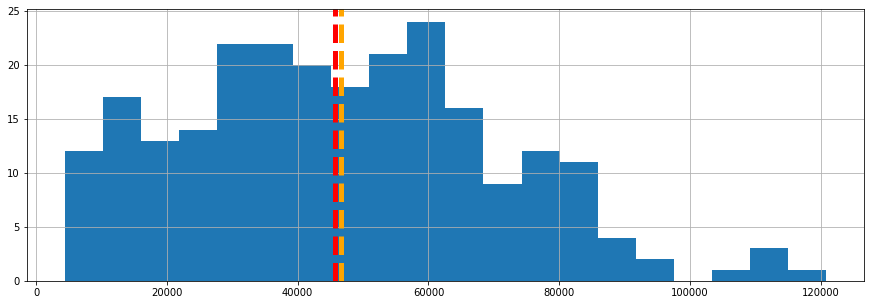

In [14]:
ax = serie_patentamientos.hist(bins=20, figsize=(15,5))

ax.axvline(serie_patentamientos.mean(), color='orange', linestyle='dashed', linewidth=5)
ax.axvline(serie_patentamientos.median(), color='red', linestyle='dashed', linewidth=5)

La media y la mediana son muy parecidas cuando la distribución se aproxima a la normal, pero se diferencian cuando una de las colas es sustancialmente más grande que la otra.

In [15]:
serie_patentamientos = df.groupby(
    ["anio_inscripcion_inicial", "mes_inscripcion_inicial", "provincia_id"]
).sum()[
    "cantidad_inscripciones_iniciales"]
serie_patentamientos

anio_inscripcion_inicial  mes_inscripcion_inicial  provincia_id
2000                      1                        2                8892
                                                   6               16346
                                                   10                361
                                                   14               4535
                                                   18                731
                                                                   ...  
2020                      2                        78                290
                                                   82               2503
                                                   86                261
                                                   90                792
                                                   94                256
Name: cantidad_inscripciones_iniciales, Length: 5808, dtype: int64

In [16]:
serie_patentamientos.agg(["mean", "median"])

mean      1942.35761
median     736.00000
Name: cantidad_inscripciones_iniciales, dtype: float64

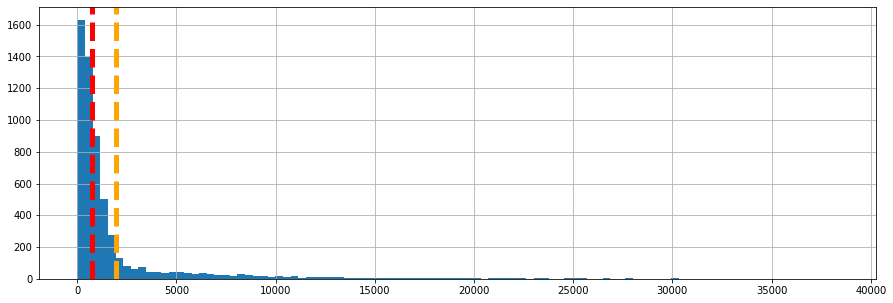

In [17]:
ax = serie_patentamientos.hist(bins=100, figsize=(15,5))

ax.axvline(serie_patentamientos.mean(), color='orange', linestyle='dashed', linewidth=5)
ax.axvline(serie_patentamientos.median(), color='red', linestyle='dashed', linewidth=5)

**Ejercicio:** calcular y graficar la media y la mediana de la cantidad de patentamientos por provincia en el año 2017. ¿Cuál es la provincia más cerca de la cantidad de patentamientos promedio y cuál de la cantidad de patentamientos mediana

## Desvío estándar, varianza y desviación absoluta

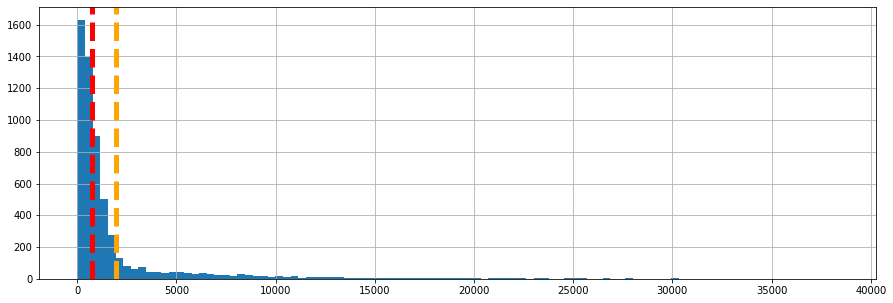

In [18]:
ax = serie_patentamientos.hist(bins=100, figsize=(15,5))

ax.axvline(serie_patentamientos.mean(), color='orange', linestyle='dashed', linewidth=5)
ax.axvline(serie_patentamientos.median(), color='red', linestyle='dashed', linewidth=5)

Desvío estándar

In [19]:
serie_patentamientos.std()

3753.5672422227863

Varianza

In [20]:
serie_patentamientos.var()

14089267.041887974

In [21]:
serie_patentamientos.std() ** 2

14089267.041887973

Desvío absoluto mediano

In [22]:
serie_patentamientos.mad()

2066.9925427024737

**Ejercicio:** Calcular el desvío estándar, la varianza y el desvío absoluto mediano de los patentamientos de automotores y motos por separado. ¿Cuál de ellos es más disperso? 

## Distribuciones probabilísticas 

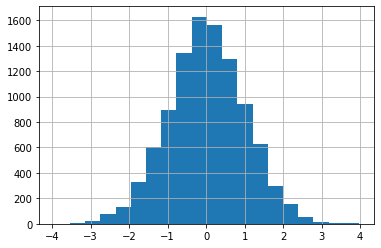

In [23]:
normal_distribution = pd.Series(np.random.normal(0, 1, 10000))
normal_distribution.hist(bins=20)

In [24]:
normal_distribution.mean()

0.015990861497839178

In [25]:
normal_distribution.median()

0.008703397239670348

In [26]:
normal_distribution.std()

0.989030091136738

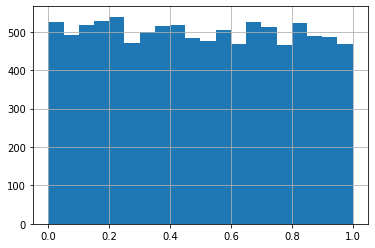

In [27]:
uniform_distribution = pd.Series(np.random.uniform(0, 1, 10000))
uniform_distribution.hist(bins=20)

In [28]:
uniform_distribution.mean()

0.49439842958478664

In [29]:
uniform_distribution.median()

0.4902722650903922

In [30]:
uniform_distribution.std()

0.28844319377965855

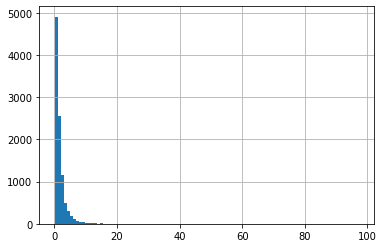

In [31]:
uniform_distribution = pd.Series(np.random.lognormal(0, 1, 10000))
uniform_distribution.hist(bins=100)

**Ejercicio:** graficar las tres distribuciones con su media y su mediana.

## Quantiles 

In [32]:
serie_patentamientos.quantile(0.5), serie_patentamientos.median()

(736.0, 736.0)

In [33]:
serie_patentamientos.quantile(0.25)

352.0

In [34]:
serie_patentamientos.quantile(0.75)

1472.0

**Ejercicio:** calcular valores maximo y minimo de la serie de patentamientos usando cuantiles y usando max() / min() y comparar el resultado.

**Ejercicio:** graficar la distribución y la distribución logarítmica con sus medianas y quantiles 0.25 y 0.75

## Valores anómalos (outliers)

Criterio 1: umbral de desvíos estándares.

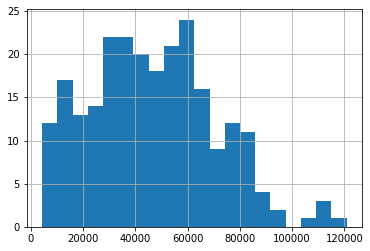

In [35]:
serie_patentamientos_normal = df.groupby(
    ["anio_inscripcion_inicial", "mes_inscripcion_inicial"]
).sum()[
    "cantidad_inscripciones_iniciales"]
serie_patentamientos_normal.hist(bins=20)

In [36]:
media = serie_patentamientos_normal.mean()
desvio_estandar = serie_patentamientos_normal.std()

umbral_superior = media + 3 * desvio_estandar
umbral_inferior = media - 3 * desvio_estandar

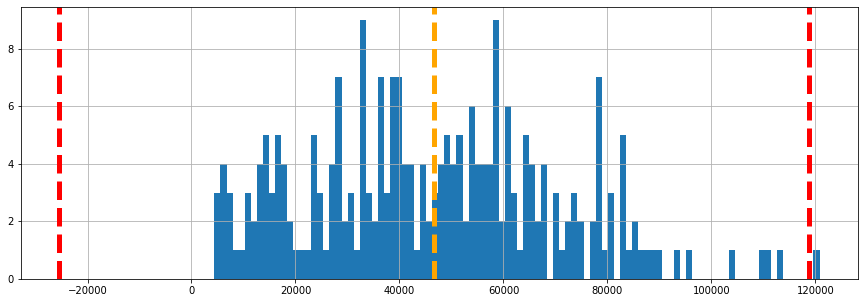

In [37]:
ax = serie_patentamientos_normal.hist(bins=100, figsize=(15,5))

ax.axvline(media, color='orange', linestyle='dashed', linewidth=5)
ax.axvline(umbral_inferior, color='red', linestyle='dashed', linewidth=5)
ax.axvline(umbral_superior, color='red', linestyle='dashed', linewidth=5)

In [38]:
serie_patentamientos_normal[serie_patentamientos_normal < umbral_inferior]

Series([], Name: cantidad_inscripciones_iniciales, dtype: int64)

In [39]:
serie_patentamientos_normal[serie_patentamientos_normal > umbral_superior]

anio_inscripcion_inicial  mes_inscripcion_inicial
2018                      1                          120788
Name: cantidad_inscripciones_iniciales, dtype: int64

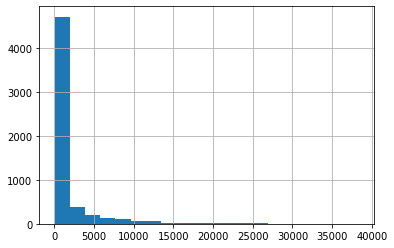

In [40]:
serie_patentamientos.hist(bins=20)

In [41]:
media = serie_patentamientos.mean()
desvio_estandar = serie_patentamientos.std()

umbral_superior = media + 3 * desvio_estandar
umbral_inferior = media - 3 * desvio_estandar

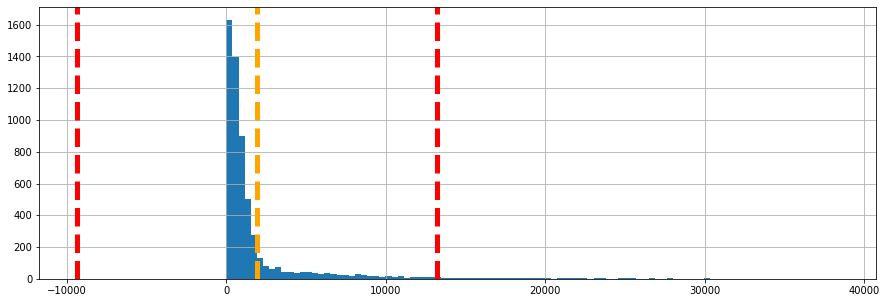

In [42]:
ax = serie_patentamientos.hist(bins=100, figsize=(15,5))

ax.axvline(media, color='orange', linestyle='dashed', linewidth=5)
ax.axvline(umbral_inferior, color='red', linestyle='dashed', linewidth=5)
ax.axvline(umbral_superior, color='red', linestyle='dashed', linewidth=5)

In [43]:
serie_patentamientos[serie_patentamientos < umbral_inferior]

Series([], Name: cantidad_inscripciones_iniciales, dtype: int64)

In [44]:
serie_patentamientos[serie_patentamientos > umbral_superior]

anio_inscripcion_inicial  mes_inscripcion_inicial  provincia_id
2000                      1                        6               16346
2005                      1                        6               15286
2006                      1                        6               18792
2007                      1                        2               15030
                                                   6               24854
                                                                   ...  
2018                      8                        6               19488
                          9                        6               15392
                          10                       6               14103
2019                      1                        6               18450
                          7                        6               14799
Name: cantidad_inscripciones_iniciales, Length: 149, dtype: int64

In [45]:
len(serie_patentamientos)

5808

**Ejercicio:** buscar los valores anómalos de patentamientos sólo de motos. ¿En qué mes y provincia son? ¿Se les ocurre alguna explicación?